In [1]:
'''
Title: Understanding Consumer Engagement Patterns on Facebook for Thai Fashion and Cosmetics Retailers

Introduction-
Social media platforms have emerged as powerful tools for businesses to connect with their target audience. 
Facebook, with its vast user base, has become a central platform for various industries, including fashion and cosmetics.
To effectively leverage this platform, understanding consumer engagement patterns is crucial. This study focuses on analyzing 
the engagement metrics of 10 Thai fashion and cosmetics retailers on Facebook to identify trends, patterns, and factors influencing 
consumer interaction.

Problem Statement-
Despite the increasing importance of social media for businesses, there is a limited understanding of consumer engagement patterns on 
platforms like Facebook, particularly within the Thai fashion and cosmetics industry. This study aims to address this gap by examining 
the factors influencing consumer engagement with Facebook posts and identifying opportunities for businesses to enhance their social media strategies.

Objectives-
1. To analyze consumer engagement metrics for Facebook posts of Thai fashion and cosmetics retailers.
2. To identify clusters of posts based on engagement patterns using unsupervised machine learning techniques.
3. To examine the impact of Facebook Live on engagement variability.
4. To analyze seasonal patterns in engagement metrics.
5. To identify outlier posts and understand their characteristics.

Key Tasks-
1. Data Collection and Preprocessing: Gather and clean the dataset containing Facebook post information and engagement metrics.
2. Exploratory Data Analysis: Conduct an in-depth analysis of the dataset to understand data distribution, identify outliers, and 
visualize relationships between variables.
3. Clustering: Apply K-means and Agglomerative clustering algorithms to group similar posts based on engagement metrics.
4. Principal Component Analysis (PCA): Reduce data dimensionality and identify underlying patterns in engagement.
5. Time Series Analysis: Analyze engagement metrics as time series data to identify seasonal trends.
6. Outlier Analysis: Identify and analyze outlier posts to understand their unique characteristics.

Data Description
The dataset consists of 7051 Facebook posts from 10 Thai fashion and cosmetics retailers. Each post is represented by 11 features, 
including post type (video, photo, status, or link), publication date, and various engagement metrics such as number of reactions 
(likes, loves, wows, hahas), comments, and shares. The dataset is multivariate and contains no missing values.
status_id (ID) - Integer
status_type (Feature) - Categorical
status_published (Feature) - Categorical
num_reactions (Feature) - Integer
num_comments (Feature) - Integer
num_shares (Feature) - Binary
num_likes (Feature) - Integer
num_loves (Feature) - Binary
num_wows (Feature) - Binary
num_hahas (Feature) - Binary

'''

'\nTitle: Understanding Consumer Engagement Patterns on Facebook for Thai Fashion and Cosmetics Retailers\n\nIntroduction-\nSocial media platforms have emerged as powerful tools for businesses to connect with their target audience. \nFacebook, with its vast user base, has become a central platform for various industries, including fashion and cosmetics.\nTo effectively leverage this platform, understanding consumer engagement patterns is crucial. This study focuses on analyzing \nthe engagement metrics of 10 Thai fashion and cosmetics retailers on Facebook to identify trends, patterns, and factors influencing \nconsumer interaction.\n\nProblem Statement-\nDespite the increasing importance of social media for businesses, there is a limited understanding of consumer engagement patterns on \nplatforms like Facebook, particularly within the Thai fashion and cosmetics industry. This study aims to address this gap by examining \nthe factors influencing consumer engagement with Facebook posts

In [183]:
#Import Pandas library for data manipulation.
import pandas as pd

In [184]:
#Load CSV data into Pandas DataFrame
df = pd.read_csv("C://Users//user//Desktop//Live_20210128.csv")

In [185]:
#Display first 5 rows of DataFrame to verify the correcting loading of dataset
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [186]:
#Display DataFrame column names
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [187]:
#Checking for the data type of different columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [188]:
#Drop 'Column1' from DataFrame
df.drop(['Column1'],axis=1,inplace=True)

In [189]:
#Drop 'status_id' from DataFrame
df.drop(['status_id'],axis=1,inplace=True)

In [190]:
#Drop 'status_published' from DataFrame
df.drop(['status_published'],axis=1,inplace=True)

In [191]:
#Drop'Column2' from DataFrame
df.drop(['Column2'],axis=1,inplace=True)

In [192]:
#Drop 'Column3' from DataFrame
df.drop(['Column3'],axis=1,inplace=True)

In [193]:
#Drop 'Column4' from DataFrame
df.drop(['Column4'],axis=1,inplace=True)

In [194]:
#Display first 5 rows of DataFrame to verify the correcting loading of dataset after dropping
df.head(5)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [195]:
#Checking for simple descriptive statistics
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [196]:
#Checking for the missing values
df.isna().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

In [197]:
#Imported LabelEncoder for handling categorical features
from sklearn.preprocessing import LabelEncoder

In [198]:
le = LabelEncoder()

In [199]:
#Encoding 'status_type' column using LabelEncoder
df['status_type']=le.fit_transform(df['status_type'])

In [200]:
#Displaying the first 5 rows of the modified DataFrame
df.head(5)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [201]:
#Displaying the column names of the DataFrame
df.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [202]:
#Importing StandardScaler for data normalization
from sklearn.preprocessing import StandardScaler

In [203]:
sc=StandardScaler()

In [204]:
#Normalizing 'num_reactions', 'num_comments', and 'num_shares' columns
df['num_reactions']=sc.fit_transform(df[['num_reactions']])
df['num_comments']=sc.fit_transform(df[['num_comments']])
df['num_shares']=sc.fit_transform(df[['num_shares']])

In [205]:
#Normalizing 'num_likes', 'num_loves', and 'num_wows' columns
df['num_likes']=sc.fit_transform(df[['num_likes']])
df['num_loves']=sc.fit_transform(df[['num_loves']])
df['num_wows']=sc.fit_transform(df[['num_wows']])

In [206]:
#Normalizing 'num_hahas' column
df['num_hahas']=sc.fit_transform(df[['num_hahas']])

In [207]:
#Displaying the first 5 rows of the normalized DataFrame
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,1,0
1,1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,0,0
2,3,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,0,0
3,1,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,0,0
4,1,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,0,0


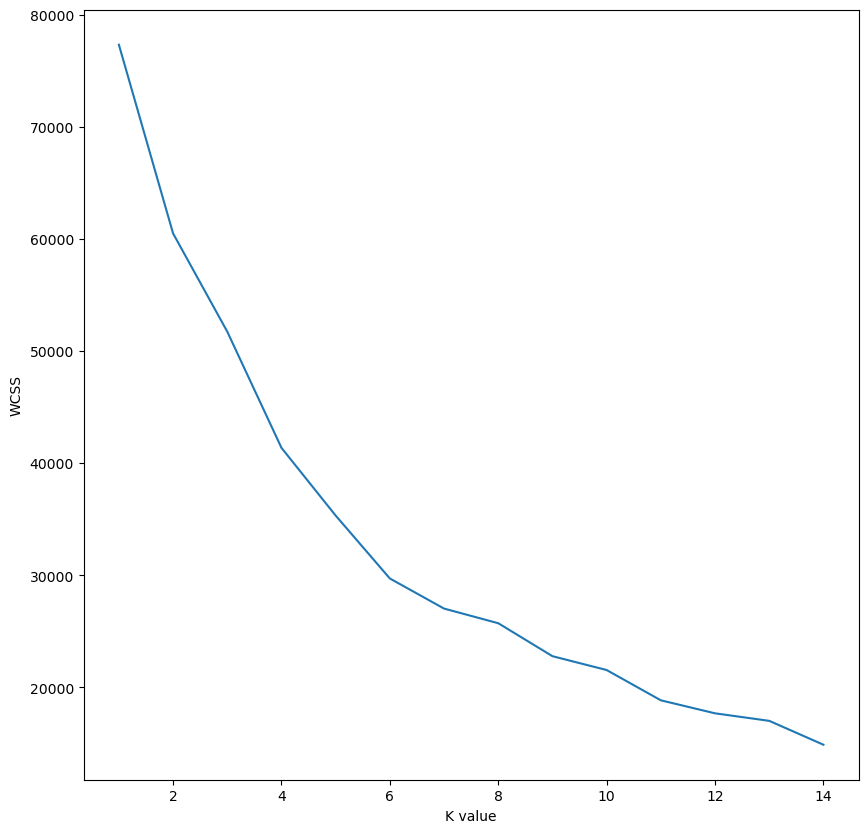

In [208]:
#Performing Elbow Method to determine optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(df)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

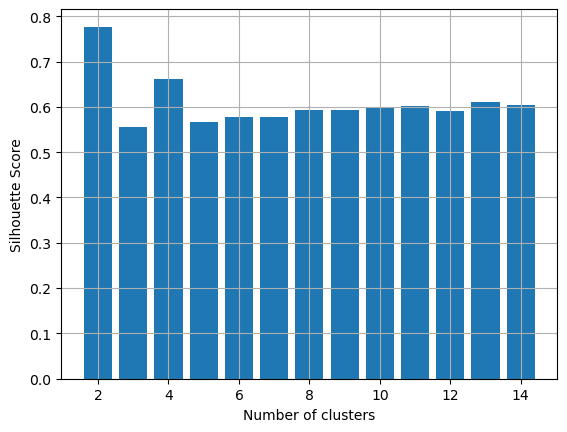

In [209]:
#Performing Silhouette Analysis to determine optimal number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = [] 

for n_cluster in range(2,15):
    silhouette_scores.append( 
        silhouette_score(df, KMeans(n_clusters = n_cluster).fit_predict(df))) #Makesure that in exam you change the dataframe name
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 

In [210]:
#Creating a K-Means model with 2 clusters and fitting it to the data
kmeans = KMeans(n_clusters = 2) # 2 because in the above bar plot, 2 is the highest height in the grph.
clusters = kmeans.fit_predict(df)

In [211]:
#Labels of each point
kmeans.labels_   #like feature importance, it starts from 0,so cluster 1 is 0, 1 is cluster 2 and so on

array([1, 0, 0, ..., 0, 0, 0])

In [212]:
#Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided
kmeans.inertia_

61718.88407065305

In [213]:
#Coordinates of cluster centers
kmeans.cluster_centers_

array([[ 1.64220326, -0.20081585, -0.15884084, -0.16760062, -0.18919409,
        -0.16250771, -0.08410013, -0.10354563,  0.08254461,  0.04903026],
       [ 2.37355372,  2.13926969,  1.69211439,  1.78543137,  2.01546435,
         1.73117713,  0.89590964,  1.10306049,  1.96033058,  0.79669421]])

In [214]:
#Number of features seen during fit.
kmeans.n_features_in_

10

In [215]:
#Assigning data points to their respective clusters
clusters

array([1, 0, 0, ..., 0, 0, 0])

In [216]:
#Adding cluster labels as a new column to the DataFrame
df["Cluster"] = clusters

In [217]:
#Displaying DataFrame column names
df.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys', 'Cluster'],
      dtype='object')

In [218]:
#Creating a new DataFrame with sample data
data = [["link",33,1,1,33,0,0,0,0,0]]
new_data = pd.DataFrame(data, columns=['status_type', 'num_reactions', 'num_comments', 'num_shares','num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads','num_angrys'])

In [219]:
#Displaying the first 5 rows of the new DataFrame
new_data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,link,33,1,1,33,0,0,0,0,0


In [222]:
#Preprocessing new data using LabelEncoder and StandardScaler
new_data['status_type']=le.fit_transform(new_data['status_type'])
new_data['num_reactions']=sc.fit_transform(new_data[['num_reactions']])
new_data['num_comments']=sc.fit_transform(new_data[['num_comments']])
new_data['num_shares']=sc.fit_transform(new_data[['num_shares']])
new_data['num_likes']=le.fit_transform(new_data['num_likes'])
new_data['num_loves']=sc.fit_transform(new_data[['num_loves']])
new_data['num_wows']=sc.fit_transform(new_data[['num_wows']])
new_data['num_hahas']=sc.fit_transform(new_data[['num_hahas']])
new_data['num_sads']=le.fit_transform(new_data['num_sads'])
new_data['num_angrys']=sc.fit_transform(new_data[['num_angrys']])

In [223]:
#Displaying the first 5 rows of the preprocessed new DataFrame
new_data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0


In [224]:
#Assigning the value 1 to the first element of the 'status_type' column in the new DataFrame
new_data['status_type'][0]=1

C:\Users\user\AppData\Local\Temp\ipykernel_8880\902974071.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_data['status_type'][0]=1
C:\Users\user\AppData\Local\Temp\ipykernel_8880\902974071.py:2: SettingWithCopyWarning: 
A value is tr

In [225]:
#Displaying the new DataFrame
new_data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0


In [226]:
#Predicting the cluster for the new data point
kmeans.predict(new_data)

array([0])

In [227]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster
0,3,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,1,0,1
1,1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,0,0,0
2,3,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,0,0,0
3,1,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,0,0,0
4,1,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,0,0,0


In [228]:
#Saving the DataFrame to a CSV file for further analysis in Excel
df.to_csv("C://Users//user//Desktop//Live_20210128_Calc.csv")  # for analysis of cluster in excel. Open from the path you have saved. Then from original copy and paste in the created one.

In [229]:
#Creating a new DataFrame by dropping the 'Cluster' column from the original DataFrame
df1=df.drop(['Cluster'],axis=1)

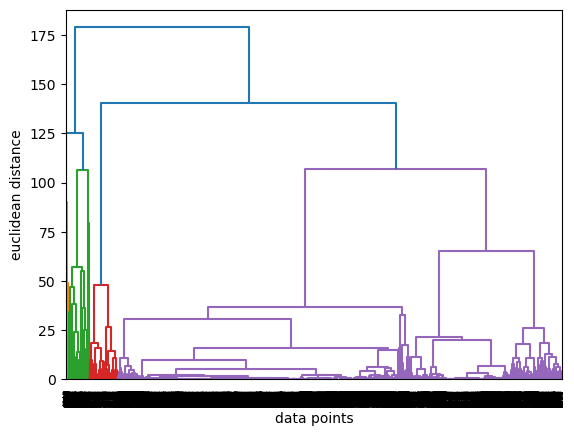

In [230]:
#Performing hierarchical clustering and visualizing dendrogram
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df1, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

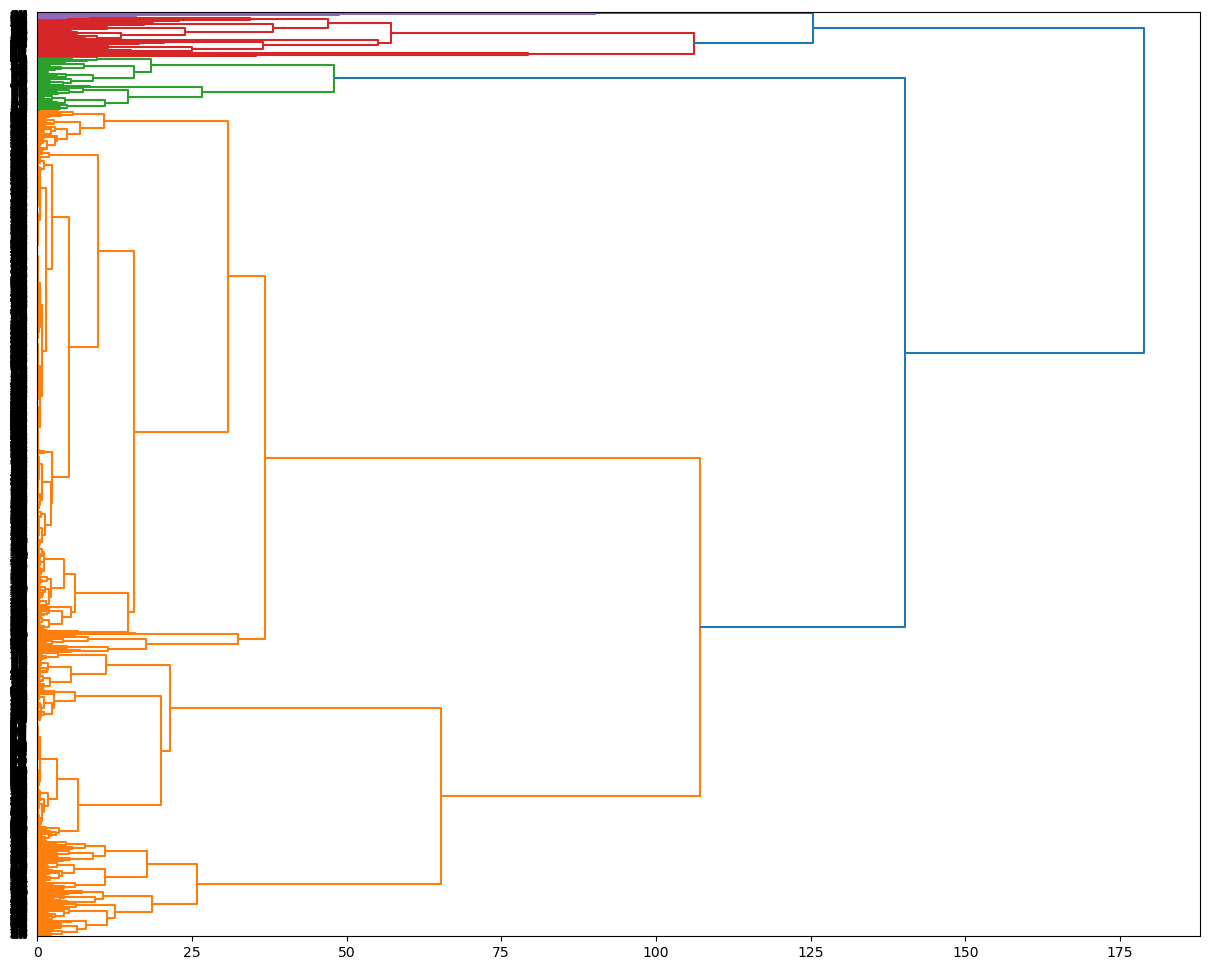

In [231]:
#Creating a customized hierarchical clustering dendrogram with specific formatting
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(df1, 'ward')

#labelList = ["foo" for i in range(0, 20)]

plt.figure(figsize=(15, 12))
dendrogram(
            linked,
            orientation='right',
            #labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False
          )
plt.show()

In [232]:
#Performing hierarchical clustering with 2 clusters and assigning cluster labels to the DataFrame.
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, linkage = "ward")
cluster = hc.fit_predict(df1)
df1["label"] = cluster

In [233]:
df1.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,label
0,3,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,1,0,0
1,1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,0,0,0
2,3,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,0,0,0
3,1,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,0,0,0
4,1,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,0,0,0


In [236]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster
0,3,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,1,0,1
1,1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,0,0,0
2,3,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,0,0,0
3,1,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,0,0,0
4,1,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,0,0,0


In [235]:
'''
Interpretation-
The clustering analysis identified two distinct clusters within the dataset:
Cluster 0: Encompasses a substantial majority of the data points (6444 out of 7050), representing the predominant pattern of engagement.
The provided maximum and minimum values for various engagement metrics offer insights into the characteristics of this cluster.

1. num_reactions
Maximum: 1668, which indicates that the most highly engaged post in Cluster 0 received 1668 reactions, which is lower than the maximum in Cluster 1.
Minimum: 0, which indicates that there are posts in Cluster 0 that received no reactions, suggesting they were less engaging or less visible to users.

2. num_comments
Maximum: 3863, which implies that the most commented-upon post in Cluster 0 generated 3863 comments, indicating a moderate level of 
discussion and engagement.
Minimum: 0, which implies that there are posts that received no comments, possibly due to various reasons such as being very
recent or having a less engaging topic.

3. num_shares
Maximum: 496, which implies that the most shared post in Cluster 0 was shared 496 times, suggesting it was moderately disseminated among users.
Minimum: 0, which implies that there are posts that were not shared at all, potentially due to lack of interest or relevance.

4. num_likes
Maximum: 1668, which implies that the post with the most likes in Cluster 0 received 1668 likes, indicating a generally positive sentiment from users.
Minimum: 0, which implies that there are posts that received no likes, suggesting they were not well-received by users.

5. num_loves
Maximum: 159, which implies that the post that received the most love reactions had 159 love reactions, suggesting a moderate
level of affection or appreciation.
Minimum: 0, which implies that some posts did not receive any love reactions.

6. num_wows
Maximum: 38, which implies that the post with the most wow reactions had 38 wow reactions, suggesting it was moderately 
impressive or astonishing to users.
Minimum: 0, which implies that some posts did not receive any wow reactions.

7.num_hahas
Maximum: 32, which implies that the post that received the most haha reactions had 32 haha reactions, indicating a moderately 
humorous or amusing nature.
Minimum: 0, which implies that some posts did not receive any haha reactions.

8. num_sads
Maximum: 8, which implies that the post with the most sad reactions had 8 sad reactions, suggesting it was emotionally 
impactful or evoked feelings of sadness, but to a lesser extent than posts in Cluster 1.
Minimum: 0, which implies that some posts did not receive any sad reactions.

9. num_angrys
Maximum: 12, which implies that the post with the most angry reactions had 12 angry reactions, indicating it was perceived as 
negative or offensive, but to a lesser extent than posts in Cluster 1.
Minimum: 0, which implies that some posts did not receive any angry reactions.

Overall, Cluster 0 is characterized by content that receives moderate levels of engagement and primarily elicits positive emotions.
While there are outliers with zero reactions or comments, the overall trend suggests that content in this cluster is generally well-received
but not as widely discussed or shared as content in Cluster 1.


Cluster 1: Represents a smaller segment of the data (606 out of 7050), indicating a distinct engagement behavior that deviates from the norm.
The provided maximum and minimum values for various engagement metrics offer insights into the characteristics of this cluster.

1. num_reactions
Maximum: 4710, which indicates that the most highly engaged post in Cluster 1 received 4710 reactions.
Minimum: 55, which suggests that even the least engaged post in Cluster 1 still received a significant number of reactions (55).

2. num_comments
Maximum: 20990, which implies that the most commented-upon post in Cluster 1 generated 20990 comments, indicating a high 
level of discussion and engagement.
Minimum: 0, which implies that there are posts in Cluster 1 that received no comments, possibly due to various reasons 
such as being very recent or having a less engaging topic.

3. num_shares
Maximum: 3424, whic means that the most shared post in Cluster 1 was shared 3424 times, suggesting it was widely disseminated among users.
Minimum: 0, which implies that there are posts that were not shared at all, potentially due to lack of interest or relevance.

4. num_likes
Maximum: 4710, which implies that the post with the most likes in Cluster 1 received 4710 likes, indicating strong positive sentiment from users.
Minimum: 41, which implies that even the least liked post in Cluster 1 received 41 likes, suggesting a generally positive reception.

5. num_loves
Maximum: 657, which implies that the post that received the most love reactions had 657 love reactions, indicating a high 
level of affection or appreciation.
Minimum: 0, which implies that some posts did not receive any love reactions, possibly due to the nature of the content or user preferences.

6. num_wows
Maximum: 278, which implies that the post with the most wow reactions had 278 wow reactions, suggesting it was particularly
impressive or astonishing to users.
Minimum: 0, which implies that some posts did not receive any wow reactions.

7. num_hahas
Maximum: 157, which implies that the post that received the most haha reactions had 157 haha reactions, indicating a humorous or amusing nature.
Minimum: 0, which implies that some posts did not receive any haha reactions.

8. num_sads
Maximum: 51, which implies that the post with the most sad reactions had 51 sad reactions, suggesting it was emotionally 
impactful or evoked feelings of sadness.
Minimum: 0, which implies that some posts did not receive any sad reactions.

9. num_angrys
Maximum: 31, which implies that the post with the most angry reactions had 31 angry reactions, indicating it was perceived as negative or offensive.
Minimum: 0, which implies that some posts did not receive any angry reactions.

Overall, Cluster 1 is characterized by highly engaged content that elicits a variety of reactions, from positive emotions
like likes and loves to negative ones like sads and angrys. The presence of outliers (posts with zero reactions or comments) suggests
that the cluster might be influenced by a few extreme cases. Further analysis of the content and user demographics within this
cluster could provide additional insights into the factors driving engagement and sentiment.

Thus,  Cluster 0 represents the majority of the data points and is characterized by moderate engagement levels and primarily 
positive sentiment. Content in this cluster is generally well-received but not as widely discussed or shared. Cluster 1, on the 
other hand, represents a smaller segment of the data and is characterized by high levels of engagement and a wider range of emotions. 
Content in this cluster is more likely to be discussed, shared, and elicit both positive and negative reactions.

'''

'\nInterpretation-\nThe clustering analysis identified two distinct clusters within the dataset:\nCluster 0: Encompasses a substantial majority of the data points (6444 out of 7050), representing the predominant pattern of engagement.\nThis group had most of the posts.People generally liked, reacted, and shared these posts.There were not many angry or sad reactions.\nCluster 1: Represents a smaller segment of the data (606 out of 7050), indicating a distinct engagement behavior that deviates from the norm.\nThis group had fewer posts.People talked about these posts a lot (lots of comments).There were more shares compared to the first group.\nPeople had strong feelings about these posts (more likes, loves, wows, but also more angry and sad reactions).\n'